Insert the required parameters

In [1]:
import QuantLib as ql
import numpy as np
import matplotlib.pyplot as plt

S0 = float(input('The Current Stock Price: '))
X = float(input('The Strike Price: '))
r = float(input('The Riskless Interest Rate(%): ')) / 100
num_paths = int(input('The Number of Monte Carlo: '))
T = 1
dt = 1/12
np.random.seed(1)

The Current Stock Price: 120
The Strike Price: 130
The Riskless Interest Rate(%): 3
The Number of Monte Carlo: 1000


Use Hull-White model to get the interest rates

In [2]:
sigma = 0.1
a = 0.2
timestep = 12
length = 12 # in years
forward_rate = 0.03
day_count = ql.Thirty360()
todays_date = ql.Date(12, 5, 2020)

ql.Settings.instance().evaluationDate = todays_date

spot_curve = ql.FlatForward(todays_date, ql.QuoteHandle(ql.SimpleQuote(forward_rate)), day_count)
spot_curve_handle = ql.YieldTermStructureHandle(spot_curve)

hw_process = ql.HullWhiteProcess(spot_curve_handle, a, sigma)
rng = ql.GaussianRandomSequenceGenerator(ql.UniformRandomSequenceGenerator(timestep, ql.UniformRandomGenerator()))
seq = ql.GaussianPathGenerator(hw_process, length, timestep, rng, False)

def generate_paths(num_paths, timestep):
    arr = np.zeros((num_paths, timestep+1))
    for i in range(num_paths):
        sample_path = seq.next()
        path = sample_path.value()
        time = [path.time(j) for j in range(len(path))]
        value = [path[j] for j in range(len(path))]
        arr[i, :] = np.array(value)
    return arr #interest rates


Define the geometric Brownian motion and plot the historical stock prices

In [3]:
def genBrownPath (T, mu, sigma, S0, dt):
   n = int(T/dt) + 1
   t = np.linspace(0, T, n)
   W = [0] + np.random.standard_normal(size = n) 
   W = np.cumsum(W)*np.sqrt(dt) # standard brownian motion
   X = (mu-0.5*sigma**2)*t + sigma*W 
   S = S0*np.exp(X) # geometric brownian motion
   plt.plot(np.linspace(0, T, n), S)
   return S[timestep - 1]


Set three lists to take the last stock prices, call prices and put prices

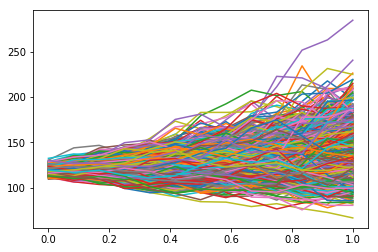

In [4]:
S = []
c = []
p = []
for i in range(num_paths):
    mu = generate_paths(num_paths, timestep)[i]
    S.append(genBrownPath (T, mu, sigma, S0, dt))
    c.append(max(0, S[i]-X))
    p.append(max(0, X-S[i]))

Derive the expected value of call and put prices and discount them to get the current rational option prices.

In [5]:
call = np.mean(c) / ((1 + r*dt)**timestep)
put = np.mean(p) / ((1 + r*dt)**timestep)

print(call, put)

12.76035464497686 6.401949135307441
